# **PROJECT NAME** Yes Bank Stock Closing Price Prediction

# **Business Context**
Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

# **Summary**
The objective of this project was to predict the monthly closing price of YES Bank’s stock using historical financial data and machine learning regression techniques.The main stops in this project involved laoding the dataset ,EDA , Checking for outliers using Boxplot howerever the outliers were not removed because the stock value are consider volatile in nature so the outlier in the dataset can act as training data that the model can get trained. The next step was feature engineering for which we have used VIF and we have used three models for prediction - these models are Random Forest , XG BOOST and descion Tree Classifier andin the result we have found that the Random forest is the best evaluated model.\

# **Technical Documentaion**
# ***Libraries used-***

Pandas

Numpy

matplotlib

Seaborn

Train_test_split from sklearn.model_selection

R2_score , Mean_absolute_error, Mean_squared_error from Sklearn.Metrics

Random forest Regressor from sklearn.metrics

Decision Tree regressor from sklearn.tree

XG regressor from XGboost

Variance Inflation factor(VIF) from statsmodel.stats.outliers_influence

Gridsearch CV from sklearn.model_selection

Warnings

# ***Methods used-***

Decision Tree Regressor

XG boost

Random Forest Regressor

# ***Evaluation Metrics***

R2_score

Mean Squared _Error

Mean Absolute Error

# ***Columns Made for feature Engineering***

Year, Month, Quarter, Month_sin, Month_cos  =  Capture seasonality

Prev_Close_1, Prev_Close_2, Prev_Close_3 = Capture recent trends

Rolling_Mean_3, Rolling_Std_3 =  Capture volatility

High_Low_Spread, Open_Close_Spread, Price_Change =	Capture intra-month price movements




In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import (r2_score, mean_absolute_error, mean_squared_error)
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:


data = pd.read_csv('/content/data_YesBank_StockPrices.csv')

In [ ]:
data.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
# For data safety purpose
data_2 = data.copy

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [ ]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
data.dtypes

,0
Date,object
Open,float64
High,float64
Low,float64
Close,float64


In [ ]:
data.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [ ]:
data.shape

(185, 5)

In [ ]:
data.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0


In [ ]:
data['Date'] = pd.to_datetime(data['Date'], format='%b-%y')


In [ ]:
import pandas as pd

# Convert and check
data['Date'] = pd.to_datetime(data['Date'], format='%b-%y')
data = data.sort_values('Date')


# Verify
print(data.head())
print(data.index.min(), "→", data.index.max())


        Date   Open   High    Low  Close
0 2005-07-01  13.00  14.00  11.25  12.46
1 2005-08-01  12.58  14.88  12.55  13.42
2 2005-09-01  13.48  14.87  12.27  13.30
3 2005-10-01  13.20  14.47  12.40  12.99
4 2005-11-01  13.35  13.88  12.88  13.41
0 → 184


In [ ]:
data.dtypes

,0
Date,datetime64[ns]
Open,float64
High,float64
Low,float64
Close,float64


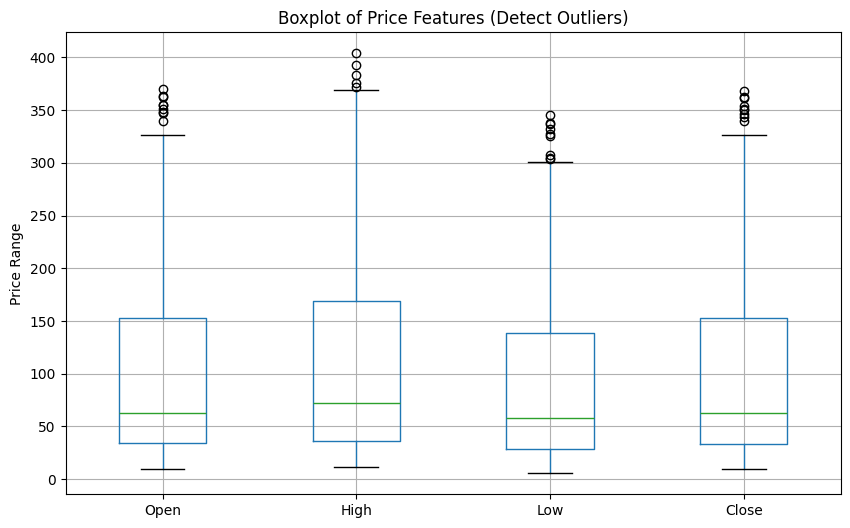

In [ ]:
num_cols = ['Open', 'High', 'Low', 'Close']

plt.figure(figsize=(10,6))
data[num_cols].boxplot()
plt.title("Boxplot of Price Features (Detect Outliers)")
plt.ylabel("Price Range")
plt.show()

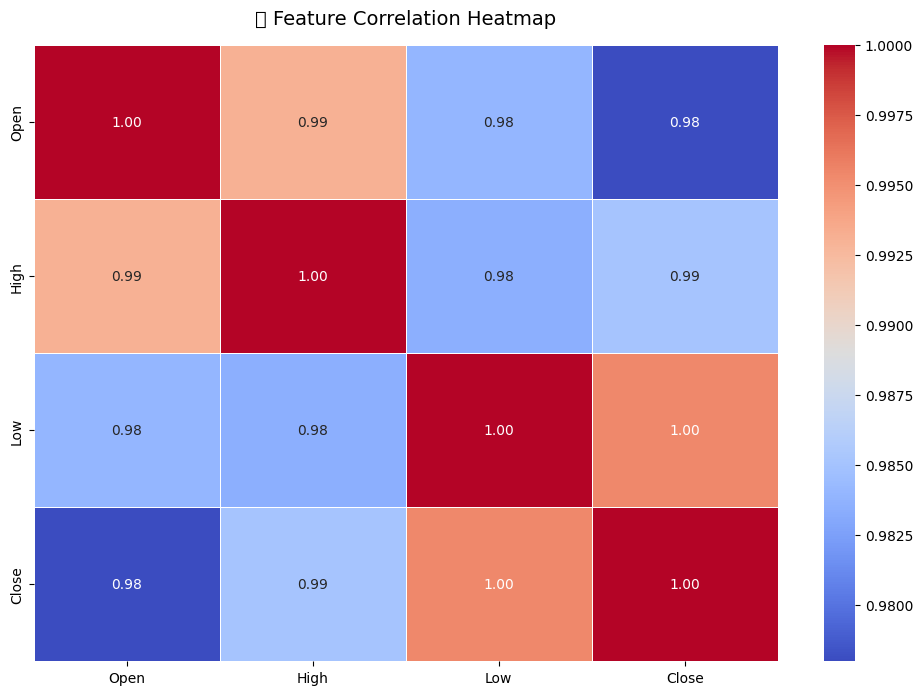

In [ ]:


# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = numeric_data.corr()

# Set figure size
plt.figure(figsize=(12,8))

# Create heatmap
sns.heatmap(corr_matrix,
            annot=True,        # show correlation values
            fmt=".2f",         # format to 2 decimal places
            cmap='coolwarm',   # color scheme
            linewidths=0.5,    # grid lines
            cbar=True)         # color bar legend

plt.title("🔗 Feature Correlation Heatmap", fontsize=14, pad=15)
plt.show()


In [ ]:
# Extract Year and Month from the Date column
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

In [ ]:
# Date-based features
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Quarter'] = data['Date'].dt.quarter

# Cyclic encoding for month
data['Month_sin'] = np.sin(2 * np.pi * data['Month'] / 12)
data['Month_cos'] = np.cos(2 * np.pi * data['Month'] / 12)

# Lag features
data['Prev_Close_1'] = data['Close'].shift(1)
data['Prev_Close_2'] = data['Close'].shift(2)
data['Prev_Close_3'] = data['Close'].shift(3)

# Rolling features
data['Rolling_Mean_3'] = data['Close'].rolling(window=3).mean()
data['Rolling_Std_3'] = data['Close'].rolling(window=3).std()

# Spread and change features
data['Price_Change'] = data['Close'].pct_change()
data['High_Low_Spread'] = (data['High'] - data['Low']) / data['Low']
data['Open_Close_Spread'] = (data['Open'] - data['Close']) / data['Close']

# Drop NA rows from shift/rolling
data.dropna(inplace=True)


In [ ]:
# Select numeric columns
X_vif = data[['Open', 'High', 'Low', 'Year', 'Quarter',
              'Month_sin', 'Month_cos',
              'Prev_Close_1', 'Prev_Close_2', 'Prev_Close_3',
              'Rolling_Mean_3', 'Rolling_Std_3',
              'Price_Change', 'High_Low_Spread', 'Open_Close_Spread']]

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif_data = vif_data.sort_values(by="VIF", ascending=False)

print(" Variance Inflation Factors (VIF):")
display(vif_data)


📊 Variance Inflation Factors (VIF):


,Feature,VIF
7,Prev_Close_1,33423.877107
0,Open,31550.358238
10,Rolling_Mean_3,5037.202916
1,High,668.445118
2,Low,647.352150
8,Prev_Close_2,600.498251
9,Prev_Close_3,62.274971
4,Quarter,19.239779
3,Year,18.436138
14,Open_Close_Spread,11.848979


In [ ]:
# Drop high-VIF features if needed (example based on typical results)
X_vif_reduced = X_vif.drop(columns=['Prev_Close_1', 'Open', 'Rolling_Mean_3' , 'High'])


In [ ]:
X = X_vif_reduced
y = data['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [ ]:
dt_params = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_grid = GridSearchCV(DecisionTreeRegressor(random_state=42), dt_params, cv=5, scoring='r2', n_jobs=-1)
dt_grid.fit(X_train, y_train)
best_dt = dt_grid.best_estimator_
y_pred_dt = best_dt.predict(X_test)


In [ ]:
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [5, 7, 9, None],
    'min_samples_split': [2, 5, 10]
}

rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=5, scoring='r2', n_jobs=-1)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
y_pred_rf = best_rf.predict(X_test)


In [ ]:
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1]
}

xgb_grid = GridSearchCV(XGBRegressor(objective='reg:squarederror', random_state=42),
                        xgb_params, cv=5, scoring='r2', n_jobs=-1)
xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)


In [ ]:
def evaluate_model(y_true, y_pred, name):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{name} Performance:")
    print(f"R² Score: {r2:.3f}")
    print(f"MAE: {mae:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print("-"*50)
    return r2, mae, rmse

r2_dt, mae_dt, rmse_dt = evaluate_model(y_test, y_pred_dt, " Decision Tree")
r2_rf, mae_rf, rmse_rf = evaluate_model(y_test, y_pred_rf, " Random Forest")
r2_xgb, mae_xgb, rmse_xgb = evaluate_model(y_test, y_pred_xgb, " XGBoost")


 Decision Tree Performance:
R² Score: 0.908
MAE: 21.449
RMSE: 38.768
--------------------------------------------------
 Random Forest Performance:
R² Score: 0.966
MAE: 16.564
RMSE: 23.538
--------------------------------------------------
 XGBoost Performance:
R² Score: 0.973
MAE: 15.785
RMSE: 21.065
--------------------------------------------------


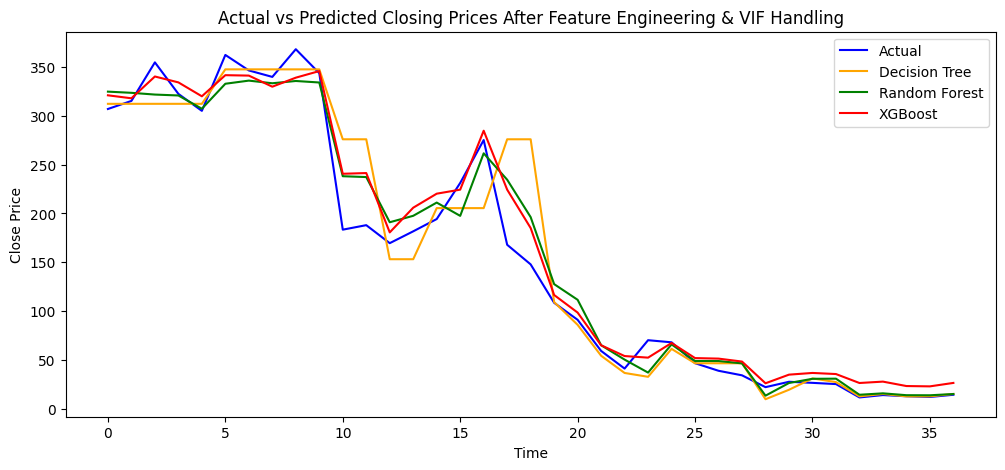

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred_dt, label='Decision Tree', color='orange')
plt.plot(y_pred_rf, label='Random Forest', color='green')
plt.plot(y_pred_xgb, label='XGBoost', color='red')
plt.title("Actual vs Predicted Closing Prices After Feature Engineering & VIF Handling")
plt.xlabel("Time")
plt.ylabel("Close Price")
plt.legend()
plt.show()


In [ ]:
results = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'XGBoost'],
    'R² Score': [r2_dt, r2_rf, r2_xgb],
    'MAE': [mae_dt, mae_rf, mae_xgb],
    'RMSE': [rmse_dt, rmse_rf, rmse_xgb]
})

print("\n Model Comparison Summary:")
display(results)



 Model Comparison Summary:


,Model,R² Score,MAE,RMSE
0,Decision Tree,0.908464,21.449376,38.767530
1,Random Forest,0.966255,16.564117,23.538282
2,XGBoost,0.972974,15.784620,21.065293


# **Conclusion**
In this project we have used three models to predict the closing stock value of the Yes bank dataset . These three models are Random forest ,XGBoost and Decision Tree regressor. While using these models for prediction who have used Grid search for hyper parameter tuning. For comparison of performance of the models we have used R**2 ,RMSE ,MAE and MSE evaluation metrics to see which of the modles performed better in the situation and as we can see in the above visual that XG Boost has a little adge in the evaluation metrics of the model.  